In [235]:
import pandas as pd
import numpy as np
import scipy.stats as stat
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
import statsmodels as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
%pylab inline
#%matplotlib inline

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 720x540 with 0 Axes>

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as smf

In [3]:
card_spend = pd.read_excel('E:\Data Science Material\AssignmentToSubmit\Supervised 1\Data Set.xlsx')

In [4]:
card_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [5]:
card_spend.head(10)

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   
5  9662-FUSYIM-1IV       4       4.0       0   64       5     August  17   
6  7432-QKQFJJ-K72       2       5.0       1   52       5       July  14   
7  8959-RZWRHU-ST8       3       4.0       1   44       4    October  16   
8  9124-DZALHM-S6I       2       3.0       1   66       6    October  12   
9  3512-MUWBGY-52X       2       2.0       0   47       4       July  11   

   edcat  jobcat     ...       owncd  ownpda  ownpc  ownipod  owngame  ownfax  \
0      3       1     ...           0       0      0        1        1       0   
1      4       2     ...           1       1      1        1        1       1   
2      2       2     ...           1       0      0        0        0       0   
3      3       2     ...           1       0      1        1        1       0   
4      3       2     ...           1       0      1        0        1       0   
5      4       3     ...           1       1      0        0        0       0   
6      2       1     ...           1       0      1        1        0       0   
7      3       1     ...           1       0      0        0        0       0   
8      2       1     ...           1       0      0        0        0       0   
9      1       6     ...           1       0      0        0        0       0   

   news  response_01  response_02  response_03  
0     0            0            1            0  
1     1            0            0            0  
2     1            0            0            0  
3     1            1            0            0  
4     0            0            1            0  
5     0            0            1            0  
6     0            0            0            0  
7     1            0            0            0  
8     0            1            0            0  
9     0            0            0            0  

[10 rows x 130 columns]

In [6]:
card_spend.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [7]:
card_spend.dtypes

custid          object
region           int64
townsize       float64
gender           int64
age              int64
agecat           int64
birthmonth      object
ed               int64
edcat            int64
jobcat           int64
union            int64
employ           int64
empcat           int64
retire           int64
income           int64
lninc          float64
inccat           int64
debtinc        float64
creddebt       float64
lncreddebt     float64
othdebt        float64
lnothdebt      float64
default          int64
jobsat           int64
marital          int64
spoused          int64
spousedcat       int64
reside           int64
pets             int64
pets_cats        int64
                ...   
cardten        float64
lncardten      float64
wireless         int64
wiremon        float64
lnwiremon      float64
wireten        float64
lnwireten      float64
multline         int64
voice            int64
pager            int64
internet         int64
callid           int64
callwait   

In [6]:
card_spend['Total_Spend'] = card_spend.cardspent + card_spend.card2spent
card_spend['Total_Spend'].head(10)
card_spend = card_spend.drop(['cardspent','card2spent'], axis=1)
card_spend.head(10)
#card_spend['cardspent']

custid  region  townsize  gender  age  agecat birthmonth  ed  \
0  3964-QJWTRG-NPN       1       2.0       1   20       2  September  15   
1  0648-AIPJSP-UVM       5       5.0       0   22       2        May  17   
2  5195-TLUDJE-HVO       3       4.0       1   67       6       June  14   
3  4459-VLPQUH-3OL       4       3.0       0   23       2        May  16   
4  8158-SMTQFB-CNO       2       2.0       0   26       3       July  16   
5  9662-FUSYIM-1IV       4       4.0       0   64       5     August  17   
6  7432-QKQFJJ-K72       2       5.0       1   52       5       July  14   
7  8959-RZWRHU-ST8       3       4.0       1   44       4    October  16   
8  9124-DZALHM-S6I       2       3.0       1   66       6    October  12   
9  3512-MUWBGY-52X       2       2.0       0   47       4       July  11   

   edcat  jobcat     ...       ownpda  ownpc  ownipod  owngame  ownfax  news  \
0      3       1     ...            0      0        1        1       0     0   
1      4       2     ...            1      1        1        1       1     1   
2      2       2     ...            0      0        0        0       0     1   
3      3       2     ...            0      1        1        1       0     1   
4      3       2     ...            0      1        0        1       0     0   
5      4       3     ...            1      0        0        0       0     0   
6      2       1     ...            0      1        1        0       0     0   
7      3       1     ...            0      0        0        0       0     1   
8      2       1     ...            0      0        0        0       0     0   
9      1       6     ...            0      0        0        0       0     0   

   response_01  response_02  response_03  Total_Spend  
0            0            1            0       149.46  
1            0            0            0        77.54  
2            0            0            0       359.97  
3            1            0            0       359.41  
4            0            1            0       507.83  
5            0            1            0       228.27  
6            0            0            0       952.46  
7            0            0            0      1304.80  
8            1            0            0       467.83  
9            0            0            0       310.81  

[10 rows x 129 columns]

In [9]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(card_spend)
output

In [174]:
card_spend.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03', 'Total_Spend'],
      dtype='object', length=129)

In [7]:
numeric_var_names=[key for key in dict(card_spend.dtypes) if dict(card_spend.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(card_spend.dtypes) if dict(card_spend.dtypes)[key] in ['object', 'O']]
print(numeric_var_names)
print(cat_var_names)

['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'longten

In [8]:
card_spend_num=card_spend[numeric_var_names]
#card_spend_cat=card_spend[cat_var_names]
#card_spend_cat=card_spend_cat.drop(['custid'], axis=1)
#Both custid and birthmonth are insignificant so only card_spend_num will be considered

In [12]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

card_spend_num.apply(var_summary).T

N   NMISS           SUM        MEAN      MEDIAN  \
region       5000.0     0.0  1.500700e+04    3.001400    3.000000   
townsize     4998.0     2.0  1.343100e+04    2.687275    3.000000   
gender       5000.0     0.0  2.518000e+03    0.503600    1.000000   
age          5000.0     0.0  2.351280e+05   47.025600   47.000000   
agecat       5000.0     0.0  2.119400e+04    4.238800    4.000000   
ed           5000.0     0.0  7.271500e+04   14.543000   14.000000   
edcat        5000.0     0.0  1.336000e+04    2.672000    2.000000   
jobcat       5000.0     0.0  1.376400e+04    2.752800    2.000000   
union        5000.0     0.0  7.560000e+02    0.151200    0.000000   
employ       5000.0     0.0  4.865200e+04    9.730400    7.000000   
empcat       5000.0     0.0  1.466300e+04    2.932600    3.000000   
retire       5000.0     0.0  7.380000e+02    0.147600    0.000000   
income       5000.0     0.0  2.737980e+05   54.759600   38.000000   
lninc        5000.0     0.0  1.849955e+04    3.699909    3.637586   
inccat       5000.0     0.0  1.196100e+04    2.392200    2.000000   
debtinc      5000.0     0.0  4.977080e+04    9.954160    8.800000   
creddebt     5000.0     0.0  9.286628e+03    1.857326    0.926437   
lncreddebt   4999.0     1.0 -6.521372e+02   -0.130454   -0.076106   
othdebt      5000.0     0.0  1.827230e+04    3.654460    2.098540   
lnothdebt    4999.0     1.0  3.483879e+03    0.696915    0.741537   
default      5000.0     0.0  1.171000e+03    0.234200    0.000000   
jobsat       5000.0     0.0  1.482100e+04    2.964200    3.000000   
marital      5000.0     0.0  2.401000e+03    0.480200    0.000000   
spoused      5000.0     0.0  3.056400e+04    6.112800   -1.000000   
spousedcat   5000.0     0.0  3.207000e+03    0.641400   -1.000000   
reside       5000.0     0.0  1.102000e+04    2.204000    2.000000   
pets         5000.0     0.0  1.533700e+04    3.067400    2.000000   
pets_cats    5000.0     0.0  2.502000e+03    0.500400    0.000000   
pets_dogs    5000.0     0.0  1.962000e+03    0.392400    0.000000   
pets_birds   5000.0     0.0  5.520000e+02    0.110400    0.000000   
...             ...     ...           ...         ...         ...   
lncardten    3578.0  1422.0  2.299333e+04    6.426309    6.639876   
wireless     5000.0     0.0  1.344000e+03    0.268800    0.000000   
wiremon      5000.0     0.0  5.350595e+04   10.701190    0.000000   
lnwiremon    1344.0  3656.0  4.845121e+03    3.605001    3.597997   
wireten      5000.0     0.0  2.109923e+06  421.984610    0.000000   
lnwireten    1344.0  3656.0  9.150129e+03    6.808132    7.147185   
multline     5000.0     0.0  2.442000e+03    0.488400    0.000000   
voice        5000.0     0.0  1.515000e+03    0.303000    0.000000   
pager        5000.0     0.0  1.218000e+03    0.243600    0.000000   
internet     5000.0     0.0  5.998000e+03    1.199600    1.000000   
callid       5000.0     0.0  2.376000e+03    0.475200    0.000000   
callwait     5000.0     0.0  2.395000e+03    0.479000    0.000000   
forward      5000.0     0.0  2.403000e+03    0.480600    0.000000   
confer       5000.0     0.0  2.390000e+03    0.478000    0.000000   
ebill        5000.0     0.0  1.743000e+03    0.348600    0.000000   
owntv        5000.0     0.0  4.915000e+03    0.983000    1.000000   
hourstv      5000.0     0.0  9.822500e+04   19.645000   20.000000   
ownvcr       5000.0     0.0  4.578000e+03    0.915600    1.000000   
owndvd       5000.0     0.0  4.568000e+03    0.913600    1.000000   
owncd        5000.0     0.0  4.664000e+03    0.932800    1.000000   
ownpda       5000.0     0.0  1.005000e+03    0.201000    0.000000   
ownpc        5000.0     0.0  3.164000e+03    0.632800    1.000000   
ownipod      5000.0     0.0  2.396000e+03    0.479200    0.000000   
owngame      5000.0     0.0  2.374000e+03    0.474800    0.000000   
ownfax       5000.0     0.0  8.940000e+02    0.178800    0.000000   
news         5000.0     0.0  2.363000e+03    0.472600    0.000000   
response_01  500

In [9]:
features_ln = card_spend_num.columns[card_spend_num.columns.str.contains("ln")]
features_original = card_spend_num.columns.difference(features_ln)

In [10]:
features_ln

Index(['lninc', 'lncreddebt', 'lnothdebt', 'lnlongmon', 'lnlongten',
       'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon',
       'lncardten', 'lnwiremon', 'lnwireten'],
      dtype='object')

In [11]:
col_list_ln = list(features_ln)

features_ln.str.replace("ln", "")

In [12]:
features_original

Index(['Total_Spend', 'active', 'address', 'addresscat', 'age', 'agecat',
       'bfast', 'callcard', 'callid', 'callwait',
       ...
       'tollfree', 'tollmon', 'tollten', 'townsize', 'union', 'voice', 'vote',
       'wireless', 'wiremon', 'wireten'],
      dtype='object', length=114)

In [13]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

card_spend_num[features_original]=card_spend_num[features_original].apply(outlier_capping)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

card_spend_num[features_original]=card_spend_num[features_original].apply(Missing_imputation)

In [15]:
col_list = list(card_spend_num)

In [16]:
col_list[col_list.index(col_list_ln[0])-1]

'income'

In [17]:
col_list_ln[0]

'lninc'

In [220]:
for i in range(len(col_list_ln)):
    print(col_list.index(col_list_ln[i])-1)

12
16
18
79
81
84
86
89
91
94
96
99
101


In [22]:
card_spend_num[col_list_ln].head()

lninc  lncreddebt  lnothdebt  lnlongmon  lnlongten  lntollmon  \
0  3.433987    0.183079   0.806516   1.871802   3.538057   3.367296   
1  2.708050    0.200505   0.449788   2.186051   5.800909        NaN   
2  3.555348   -0.074056   0.930738   3.346389   7.527444        NaN   
3  2.995732   -3.780995   0.110826   1.791759   5.295564        NaN   
4  3.135494   -1.538705  -1.735336   1.115142   4.305416   2.803360   

   lntollten  lnequipmon  lnequipten  lncardmon  lncardten  lnwiremon  \
0   5.081715    3.384390    4.837075   2.656757   4.094345        NaN   
1        NaN    4.004602    7.588324   2.772589   6.413459   3.821004   
2        NaN         NaN         NaN   3.135494   7.251345        NaN   
3        NaN         NaN         NaN   3.044522   6.529419        NaN   
4   5.960232         NaN         NaN   2.847812   5.886104   2.947067   

   lnwireten  
0        NaN  
1   7.428660  
2        NaN  
3        NaN  
4   6.018106

In [20]:
card_spend_num[col_list[col_list.index(col_list_ln[0])-1]]

0        31.00
1        15.00
2        35.00
3        20.00
4        23.00
5       107.00
6        77.00
7        97.00
8        16.00
9        84.00
10       47.00
11       19.00
12       73.00
13       63.00
14       17.00
15       23.00
16      171.00
17      272.01
18       23.00
19       22.00
20       35.00
21       28.00
22       12.00
23       29.00
24      130.00
25       69.00
26       24.00
27       29.00
28       11.00
29       30.00
         ...  
4970      9.00
4971     25.00
4972     45.00
4973     25.00
4974     30.00
4975     18.00
4976     73.00
4977     18.00
4978     17.00
4979     34.00
4980     30.00
4981     45.00
4982     55.00
4983     42.00
4984     30.00
4985     71.00
4986     16.00
4987     25.00
4988     17.00
4989     15.00
4990     89.00
4991     75.00
4992     49.00
4993     60.00
4994     53.00
4995    196.00
4996     83.00
4997    108.00
4998    189.00
4999     77.00
Name: income, Length: 5000, dtype: float64

In [18]:
for i in range(len(col_list_ln)):
    card_spend_num[col_list_ln[i]] = np.log(card_spend_num[col_list[col_list.index(col_list_ln[i])-1]]+1)  

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
card_spend_num[col_list_ln].head()

lninc  lncreddebt  lnothdebt  lnlongmon  lnlongten  lntollmon  \
0  3.465736    0.788870   1.175601   2.014903   3.566712   3.401197   
1  2.772589    0.798417   0.943120   2.292535   5.803929   0.000000   
2  3.583519    0.656805   1.263104   3.380995   7.527982   0.000000   
3  3.044522    0.032622   0.750094   1.945910   5.300565   0.000000   
4  3.178054    0.194463   0.162409   1.398717   4.318821   2.862201   

   lntollten  lnequipmon  lnequipten  lncardmon  lncardten  lnwiremon  \
0   5.087905    3.417727    4.844974   2.724580   4.110874   0.000000   
1   0.000000    4.022670    7.588830   2.833213   6.415097   3.842673   
2   0.000000    0.000000    0.000000   3.178054   7.252054   0.000000   
3   0.000000    0.000000    0.000000   3.091042   6.530878   0.000000   
4   5.962808    0.000000    0.000000   2.904165   5.888878   2.998229   

   lnwireten  
0   0.000000  
1   7.429254  
2   0.000000  
3   0.000000  
4   6.020538

In [22]:
card_spend_num.head()

region  townsize  gender   age  agecat    ed  edcat  jobcat  union  employ  \
0     1.0       2.0     1.0  20.0     2.0  15.0    3.0     1.0    1.0     0.0   
1     5.0       5.0     0.0  22.0     2.0  17.0    4.0     2.0    0.0     0.0   
2     3.0       4.0     1.0  67.0     6.0  14.0    2.0     2.0    0.0    16.0   
3     4.0       3.0     0.0  23.0     2.0  16.0    3.0     2.0    0.0     0.0   
4     2.0       2.0     0.0  26.0     3.0  16.0    3.0     2.0    0.0     1.0   

      ...       ownpda  ownpc  ownipod  owngame  ownfax  news  response_01  \
0     ...          0.0    0.0      1.0      1.0     0.0   0.0          0.0   
1     ...          1.0    1.0      1.0      1.0     1.0   1.0          0.0   
2     ...          0.0    0.0      0.0      0.0     0.0   1.0          0.0   
3     ...          0.0    1.0      1.0      1.0     0.0   1.0          1.0   
4     ...          0.0    1.0      0.0      1.0     0.0   0.0          0.0   

   response_02  response_03  Total_Spend  
0          1.0          0.0       149.46  
1          0.0          0.0        77.54  
2          0.0          0.0       359.97  
3          0.0          0.0       359.41  
4          1.0          0.0       507.83  

[5 rows x 127 columns]

In [27]:
card_spend_num.isnull().values.any()

False

In [20]:
card_spend_num.to_csv('nantreatment.csv')

In [23]:
card_spend_num.apply(var_summary).T

N  NMISS           SUM        MEAN      MEDIAN         STD  \
region       5000.0    0.0  1.500700e+04    3.001400    3.000000    1.421760   
townsize     5000.0    0.0  1.343700e+04    2.687400    3.000000    1.425653   
gender       5000.0    0.0  2.518000e+03    0.503600    1.000000    0.500037   
age          5000.0    0.0  2.351280e+05   47.025600   47.000000   17.770338   
agecat       5000.0    0.0  2.119400e+04    4.238800    4.000000    1.308785   
ed           5000.0    0.0  7.272100e+04   14.544200   14.000000    3.242553   
edcat        5000.0    0.0  1.336000e+04    2.672000    2.000000    1.211738   
jobcat       5000.0    0.0  1.376400e+04    2.752800    2.000000    1.737900   
union        5000.0    0.0  7.560000e+02    0.151200    0.000000    0.358280   
employ       5000.0    0.0  4.849000e+04    9.698000    7.000000    9.581689   
empcat       5000.0    0.0  1.466300e+04    2.932600    3.000000    1.453300   
retire       5000.0    0.0  7.380000e+02    0.147600    0.000000    0.354739   
income       5000.0    0.0  2.681495e+05   53.629900   38.000000   46.567698   
lninc        5000.0    0.0  1.864106e+04    3.728212    3.663562    0.718566   
inccat       5000.0    0.0  1.196100e+04    2.392200    2.000000    1.221261   
debtinc      5000.0    0.0  4.957060e+04    9.914120    8.800000    6.241691   
creddebt     5000.0    0.0  8.791845e+03    1.758369    0.926437    2.380681   
lncreddebt   5000.0    0.0  3.986022e+03    0.797204    0.655672    0.596398   
othdebt      5000.0    0.0  1.761253e+04    3.522506    2.098540    4.221760   
lnothdebt    5000.0    0.0  6.138453e+03    1.227691    1.130931    0.702297   
default      5000.0    0.0  1.171000e+03    0.234200    0.000000    0.423540   
jobsat       5000.0    0.0  1.482100e+04    2.964200    3.000000    1.379456   
marital      5000.0    0.0  2.401000e+03    0.480200    0.000000    0.499658   
spoused      5000.0    0.0  3.047700e+04    6.095400   -1.000000    7.709565   
spousedcat   5000.0    0.0  3.207000e+03    0.641400   -1.000000    1.886775   
reside       5000.0    0.0  1.097100e+04    2.194200    2.000000    1.361491   
pets         5000.0    0.0  1.524600e+04    3.049200    2.000000    3.351213   
pets_cats    5000.0    0.0  2.452000e+03    0.490400    0.000000    0.822462   
pets_dogs    5000.0    0.0  1.914000e+03    0.382800    0.000000    0.754969   
pets_birds   5000.0    0.0  5.300000e+02    0.106000    0.000000    0.462609   
...             ...    ...           ...         ...         ...         ...   
lncardten    5000.0    0.0  2.300989e+04    4.601979    6.054439    3.058903   
wireless     5000.0    0.0  1.344000e+03    0.268800    0.000000    0.443380   
wiremon      5000.0    0.0  5.265135e+04   10.530270    0.000000   19.021280   
lnwiremon    5000.0    0.0  4.874892e+03    0.974978    0.000000    1.619193   
wireten      5000.0    0.0  2.049800e+06  409.960020    0.000000  930.007398   
lnwireten    5000.0    0.0  9.144273e+03    1.828855    0.000000    3.087259   
multline     5000.0    0.0  2.442000e+03    0.488400    0.000000    0.499915   
voice        5000.0    0.0  1.515000e+03    0.303000    0.000000    0.459601   
pager        5000.0    0.0  1.218000e+03    0.243600    0.000000    0.429297   
internet     5000.0    0.0  5.998000e+03    1.199600    1.000000    1.449338   
callid       5000.0    0.0  2.376000e+03    0.475200    0.000000    0.499435   
callwait     5000.0    0.0  2.395000e+03    0.479000    0.000000    0.499609   
forward      5000.0    0.0  2.403000e+03    0.480600    0.000000    0.499673   
confer       5000.0    0.0  2.390000e+03    0.478000    0.000000    0.499566   
ebill        5000.0    0.0  1.743000e+03    0.348600    0.000000    0.476575   
owntv        5000.0    0.0  4.915000e+03    0.983000    1.000000    0.129284   
hourstv      5000.0    0.0  9.813300e+04   19.626600   20.000000    5.119220   
ownvcr       5000.0    0.0  4.578000e+03    0.915600    1.000000    0.278015   
owndvd       5000.

Final file for analysis


In [28]:
card_spend_new = card_spend_num
card_spend_new

region  townsize  gender   age  agecat    ed  edcat  jobcat  union  \
0        1.0       2.0     1.0  20.0     2.0  15.0    3.0     1.0    1.0   
1        5.0       5.0     0.0  22.0     2.0  17.0    4.0     2.0    0.0   
2        3.0       4.0     1.0  67.0     6.0  14.0    2.0     2.0    0.0   
3        4.0       3.0     0.0  23.0     2.0  16.0    3.0     2.0    0.0   
4        2.0       2.0     0.0  26.0     3.0  16.0    3.0     2.0    0.0   
5        4.0       4.0     0.0  64.0     5.0  17.0    4.0     3.0    0.0   
6        2.0       5.0     1.0  52.0     5.0  14.0    2.0     1.0    0.0   
7        3.0       4.0     1.0  44.0     4.0  16.0    3.0     1.0    0.0   
8        2.0       3.0     1.0  66.0     6.0  12.0    2.0     1.0    0.0   
9        2.0       2.0     0.0  47.0     4.0  11.0    1.0     6.0    0.0   
10       4.0       1.0     1.0  59.0     5.0  19.0    4.0     1.0    0.0   
11       2.0       4.0     1.0  33.0     3.0   8.0    1.0     2.0    0.0   
12       5.0       2.0     0.0  44.0     4.0  10.0    1.0     1.0    0.0   
13       3.0       2.0     0.0  58.0     5.0  18.0    4.0     1.0    0.0   
14       2.0       1.0     1.0  72.0     6.0  20.0    5.0     4.0    1.0   
15       3.0       1.0     1.0  66.0     6.0  13.0    2.0     6.0    1.0   
16       1.0       1.0     1.0  57.0     5.0  17.0    4.0     4.0    0.0   
17       5.0       2.0     0.0  63.0     5.0  14.0    2.0     6.0    1.0   
18       5.0       5.0     1.0  28.0     3.0  11.0    1.0     1.0    0.0   
19       1.0       1.0     1.0  78.0     6.0  16.0    3.0     1.0    0.0   
20       3.0       3.0     0.0  61.0     5.0  16.0    3.0     1.0    0.0   
21       2.0       4.0     0.0  70.0     6.0  17.0    4.0     2.0    1.0   
22       4.0       1.0     0.0  61.0     5.0  14.0    2.0     6.0    0.0   
23       3.0       4.0     0.0  37.0     4.0  11.0    1.0     1.0    1.0   
24       1.0       3.0     0.0  39.0     4.0  12.0    2.0     1.0    0.0   
25       4.0       3.0     1.0  73.0     6.0  14.0    2.0     3.0    0.0   
26       5.0       4.0     1.0  26.0     3.0  16.0    3.0     2.0    0.0   
27       2.0       1.0     1.0  24.0     2.0  17.0    4.0     6.0    0.0   
28       3.0       1.0     1.0  77.0     6.0  15.0    3.0     1.0    0.0   
29       5.0       3.0     0.0  36.0     4.0  19.0    4.0     1.0    1.0   
...      ...       ...     ...   ...     ...   ...    ...     ...    ...   
4970     1.0       2.0     1.0  79.0     6.0  17.0    4.0     2.0    0.0   
4971     4.0       5.0     1.0  71.0     6.0  12.0    2.0     5.0    1.0   
4972     1.0       1.0     1.0  47.0     4.0  12.0    2.0     2.0    0.0   
4973     5.0       5.0     0.0  30.0     3.0  21.0    5.0     2.0    0.0   
4974     5.0       3.0     1.0  37.0     4.0  14.0    2.0     6.0    1.0   
4975     5.0       4.0     0.0  28.0     3.0  15.0    3.0     3.0    0.0   
4976     2.0       1.0     0.0  53.0     5.0  12.0    2.0     1.0    0.0   
4977     5.0       5.0     1.0  41.0     4.0  10.0    1.0     2.0    0.0   
4978     4.0       1.0     0.0  22.0     2.0  11.0    1.0     6.0    0.0   
4979     2.0       1.0     0.0  71.0     6.0  10.0    1.0     2.0    0.0   
4980     5.0       1.0     0.0  33.0     3.0  15.0    3.0     2.0    1.0   
4981     1.0       1.0     0.0  59.0     5.0   9.0    1.0     1.0    0.0   
4982     3.0       3.0     1.0  61.0     5.0  17.0    4.0     2.0    1.0   
4983     2.0       2.0     0.0  58.0     5.0  15.0    3.0     2.0    0.0   
4984     1.0       3.0     0.0  30.0     3.0  17.0    4.0     1.0    0.0   
4985     4.0       2.0     1.0  30.0     3.0  20.0    5.0     2.0    0.0   
4986     1.0       1.0     0.0  22.0     2.0  12.0    2.0     2.0    0.0   
4987     5.0       4.0     1.0  49.0     4.0  15.0    3.0     2.0    0.0   
4988     2.0       2.0     0.0  61.0     5.0  15.0    3.0     2.0    0.0   
4989     4.0       2.0     0.0  79.0     6.0  17.0    4.0     2.0    0.0   
4990     3.0       3.0     1.0  26.0     3.0  21.0    

Assumptions checks

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


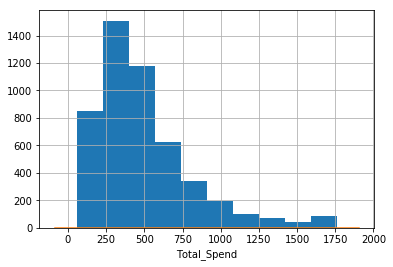

In [65]:
#Normality
card_spend_new.Total_Spend.hist()

# Distribution of variables
import seaborn as sns
sns.distplot(card_spend_new.Total_Spend)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


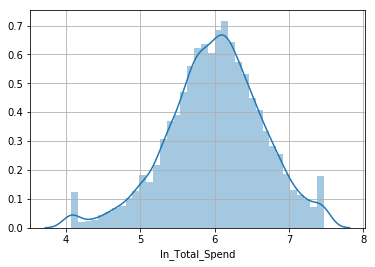

In [29]:
card_spend_new["ln_Total_Spend"]= np.log(card_spend_new["Total_Spend"])

# Distribution of variables
import seaborn as sns
sns.distplot(card_spend_new.ln_Total_Spend)

In [67]:
#Linearity
# correlation matrix (ranges from 1 to -1)
corrm=card_spend_new.corr()
corrm

region  townsize    gender       age    agecat        ed  \
region          1.000000  0.414026 -0.012810 -0.026525 -0.018455  0.013850   
townsize        0.414026  1.000000  0.009576 -0.075399 -0.069017  0.002968   
gender         -0.012810  0.009576  1.000000 -0.010186 -0.007427 -0.000777   
age            -0.026525 -0.075399 -0.010186  1.000000  0.969879 -0.093966   
agecat         -0.018455 -0.069017 -0.007427  0.969879  1.000000 -0.078331   
ed              0.013850  0.002968 -0.000777 -0.093966 -0.078331  1.000000   
edcat           0.015710  0.003744 -0.002673 -0.081129 -0.064124  0.966489   
jobcat         -0.004717 -0.010768 -0.016470  0.037709  0.032554 -0.072855   
union          -0.013768 -0.019846  0.000311  0.011206  0.004465  0.000273   
employ         -0.010204 -0.059221 -0.011756  0.705515  0.679902 -0.214669   
empcat         -0.009345 -0.058059 -0.013842  0.739573  0.732246 -0.197841   
retire         -0.042849 -0.065779 -0.021040  0.567519  0.511335 -0.092627   
income          0.036594 -0.009478 -0.001949  0.208286  0.234081  0.186802   
lninc           0.041000  0.000322  0.002882  0.146995  0.193746  0.206456   
inccat          0.041850 -0.007582 -0.002149  0.209659  0.249394  0.196343   
debtinc        -0.006781 -0.019543  0.004746  0.039031  0.040937  0.013871   
creddebt        0.007582 -0.039220 -0.006574  0.142401  0.159151  0.122362   
lncreddebt      0.003096 -0.037273  0.002513  0.135716  0.160433  0.133533   
othdebt         0.032081 -0.014535 -0.008475  0.154514  0.176380  0.135869   
lnothdebt       0.027526 -0.007674  0.000499  0.147131  0.178849  0.156132   
default        -0.006856  0.023540 -0.001620 -0.394208 -0.392859  0.110080   
jobsat          0.015631 -0.031121  0.001782  0.416807  0.422564 -0.079587   
marital         0.056498  0.029922  0.003888  0.003031  0.004785 -0.021561   
spoused         0.052967  0.026028  0.001494 -0.002796  0.000577  0.113928   
spousedcat      0.050299  0.023240 -0.001918 -0.003425  0.000824  0.169952   
reside          0.045743  0.044371  0.031148 -0.338338 -0.331160  0.022048   
pets           -0.012442 -0.000967  0.028664  0.026334  0.026966  0.031113   
pets_cats      -0.021116 -0.018682  0.013703  0.015743  0.021829  0.008898   
pets_dogs       0.020746  0.031654 -0.013189  0.013091  0.011527  0.026018   
pets_birds      0.001599 -0.012533  0.024293 -0.013373 -0.008446  0.009812   
...                  ...       ...       ...       ...       ...       ...   
wireless        0.031453  0.007954 -0.006170 -0.080747 -0.066858  0.329985   
wiremon         0.031773  0.005392 -0.017112 -0.025350 -0.013045  0.346476   
lnwiremon       0.032715  0.006902 -0.008190 -0.065434 -0.051742  0.340184   
wireten         0.023374 -0.006856 -0.012748  0.108722  0.116323  0.264967   
lnwireten       0.028740  0.003192 -0.005810 -0.027856 -0.014588  0.329615   
multline        0.021835  0.004594 -0.019839  0.238136  0.232317  0.261503   
voice           0.022923 -0.006842 -0.006053 -0.077833 -0.066107  0.333901   
pager           0.018778 -0.004005 -0.011541 -0.074501 -0.059051  0.315456   
internet        0.019668  0.003096 -0.012861 -0.126458 -0.118885  0.463451   
callid          0.023290 -0.004007 -0.039693 -0.018343 -0.009300  0.043478   
callwait        0.019332 -0.010482 -0.024920  0.001570  0.008283  0.045767   
forward         0.026085  0.002858 -0.017734 -0.002783  0.005250  0.038063   
confer          0.028630  0.003683 -0.018902  0.002204  0.012626  0.043884   
ebill           0.009908 -0.008285  0.020335 -0.120078 -0.114889  0.427759   
owntv           0.032778  0.026513 -0.000600 -0.075824 -0.059942  0.028754   
hourstv         0.006338 -0.002511 -0.004984 -0.027318 -0.019651 -0.009821   
ownvcr          0.022061 -0.004501 -0.003570  0.099194  0.126323  0.064940   
owndvd          0.011319  0.016458  0.012181  0.093029  0.120848  0.062595   
owncd           0.048589  0.020715 -0.002861  0.055100  0.078888  0.053674   
ownpda          0.040228  0.022813 -0.00

In [28]:
corrm1 = corrm.reset_index()
corrm2 = corrm1.filter(['index','ln_Total_Spend'])
corrm2[corrm2['index']=='callcard']
#corrm2[corrm2['index']=='lnequipmon']

index  ln_Total_Spend
93  callcard        0.021515

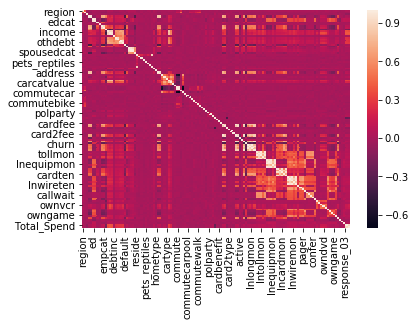

In [33]:
sns.heatmap(corrm)

In [34]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(card_spend_new)
output

In [30]:
#Dropping variable based on high coorelation with another and low coorelation with Y
card_spend_new.drop(['agecat','edcat','addresscat','card2tenurecat','commutecat','empcat','lnequipmon','equip','inccat','lnlongmon','longten','marital','spousedcat','tenure','wireless','creddebt','income','othdebt','lntollmon'],axis=1,inplace=True)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [31]:
card_spend_new.drop(['cardtenure'],axis=1,inplace=True)

In [32]:
card_spend_new.drop(['lntollten','lnequipten','lncardmon','cardten','lnwiremon','lnwireten'],axis=1,inplace=True)

In [33]:
card_spend_new.drop(['callcard'],axis=1,inplace=True)

In [60]:
#Detailed profiling using pandas profiling

output = pandas_profiling.ProfileReport(card_spend_new)
output

In [34]:
card_spend_new.drop(['Total_Spend'],axis=1,inplace=True)

In [35]:
#Splitting the data
feature_columns = card_spend_new.columns.difference( ['ln_Total_Spend','Total_Spend'] )
feature_columns

Index(['active', 'address', 'age', 'bfast', 'callid', 'callwait', 'carbought',
       'carbuy', 'carcatvalue', 'card', 'card2', 'card2benefit', 'card2fee',
       'card2tenure', 'card2type', 'cardbenefit', 'cardfee', 'cardmon',
       'cardtenurecat', 'cardtype', 'carown', 'cars', 'cartype', 'carvalue',
       'churn', 'commute', 'commutebike', 'commutebus', 'commutecar',
       'commutecarpool', 'commutemotorcycle', 'commutenonmotor',
       'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer',
       'debtinc', 'default', 'ebill', 'ed', 'employ', 'equipmon', 'equipten',
       'forward', 'gender', 'homeown', 'hometype', 'hourstv', 'internet',
       'jobcat', 'jobsat', 'lncardten', 'lncreddebt', 'lninc', 'lnlongten',
       'lnothdebt', 'longmon', 'multline', 'news', 'owncd', 'owndvd', 'ownfax',
       'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager',
       'pets', 'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish',
       'pets_reptiles', 

### F-Regression

In [36]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = card_spend_new[feature_columns]
target = card_spend_new['ln_Total_Spend']
F_values, p_values  = f_regression(features, target)

In [37]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results.drop(0, inplace=True)
f_reg_results

Variable     F_Value P_Value
1             address   11.355096   0.001
2                 age    0.264185   0.607
3               bfast    4.065689   0.044
4              callid   15.603747   0.000
5            callwait   16.065681   0.000
6           carbought    0.160034   0.689
7              carbuy    1.277132   0.258
8         carcatvalue  223.075089   0.000
9                card  298.331861   0.000
10              card2   29.990236   0.000
11       card2benefit    0.007779   0.930
12           card2fee    1.945245   0.163
13        card2tenure   16.301731   0.000
14          card2type    0.404878   0.525
15        cardbenefit    2.018254   0.155
16            cardfee    0.364467   0.546
17            cardmon    1.396857   0.237
18      cardtenurecat   28.110105   0.000
19           cardtype    0.000029   0.996
20             carown   27.674973   0.000
21               cars    0.995049   0.319
22            cartype    0.059694   0.807
23           carvalue  519.265495   0.000
24              churn    1.873489   0.171
25            commute    0.480535   0.488
26        commutebike    3.309558   0.069
27         commutebus    0.802337   0.370
28         commutecar    1.232378   0.267
29     commutecarpool    0.297471   0.585
30  commutemotorcycle    1.285001   0.257
..                ...         ...     ...
69              pager   16.789264   0.000
70               pets    0.112238   0.738
71         pets_birds    1.689187   0.194
72          pets_cats    0.035311   0.851
73          pets_dogs    0.265735   0.606
74     pets_freshfish    0.207400   0.649
75      pets_reptiles    2.303407   0.129
76      pets_saltfish    0.063503   0.801
77         pets_small    0.069119   0.793
78         polcontrib    5.567432   0.018
79           polparty    0.140413   0.708
80            polview    1.084997   0.298
81             reason    1.308831   0.253
82             region    7.698081   0.006
83             reside    0.073083   0.787
84        response_01    0.421452   0.516
85        response_02    3.600705   0.058
86        response_03   19.020900   0.000
87             retire  204.476976   0.000
88            spoused    4.723190   0.030
89        telecommute    0.044376   0.833
90           tollfree   14.792822   0.000
91            tollmon   28.315043   0.000
92            tollten   37.688933   0.000
93           townsize    0.187955   0.665
94              union    2.245453   0.134
95              voice   10.132464   0.001
96               vote   15.628862   0.000
97            wiremon   38.275030   0.000
98            wireten   47.981139   0.000

[98 rows x 3 columns]

In [38]:
f_reg_results.sort_values(by=['P_Value'])

f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

f_reg_results_new=f_reg_results[f_reg_results.P_Value<=0.1]

f_reg_results_new

Variable     F_Value  P_Value
1         address   11.355096    0.001
3           bfast    4.065689    0.044
4          callid   15.603747    0.000
5        callwait   16.065681    0.000
8     carcatvalue  223.075089    0.000
9            card  298.331861    0.000
10          card2   29.990236    0.000
13    card2tenure   16.301731    0.000
18  cardtenurecat   28.110105    0.000
20         carown   27.674973    0.000
23       carvalue  519.265495    0.000
26    commutebike    3.309558    0.069
36         confer   15.319376    0.000
39          ebill    5.209530    0.023
40             ed   48.542971    0.000
41         employ   24.274045    0.000
42       equipmon   25.091676    0.000
43       equipten   33.698885    0.000
44        forward   13.190352    0.000
45         gender   31.073380    0.000
46        homeown   24.485862    0.000
48        hourstv    9.968603    0.002
49       internet   27.519186    0.000
51         jobsat   22.326803    0.000
52      lncardten    4.773870    0.029
53     lncreddebt  363.063497    0.000
54          lninc  977.414623    0.000
55      lnlongten   17.060823    0.000
56      lnothdebt  439.493624    0.000
57        longmon    6.508605    0.011
58       multline   10.284255    0.001
59           news    4.459036    0.035
60          owncd  111.383646    0.000
61         owndvd  138.282716    0.000
62         ownfax   19.784973    0.000
63        owngame    8.693022    0.003
64        ownipod    8.424830    0.004
65          ownpc    9.851560    0.002
66         ownpda   24.646407    0.000
67          owntv   36.512224    0.000
68         ownvcr  125.995381    0.000
69          pager   16.789264    0.000
78     polcontrib    5.567432    0.018
82         region    7.698081    0.006
85    response_02    3.600705    0.058
86    response_03   19.020900    0.000
87         retire  204.476976    0.000
88        spoused    4.723190    0.030
90       tollfree   14.792822    0.000
91        tollmon   28.315043    0.000
92        tollten   37.688933    0.000
95          voice   10.132464    0.001
96           vote   15.628862    0.000
97        wiremon   38.275030    0.000
98        wireten   47.981139    0.000

In [39]:
all_columns_new = "+".join(f_reg_results_new.Variable)
print(all_columns_new)
#"+".join(f_reg_results_new['Variable'])

address+bfast+callid+callwait+carcatvalue+card+card2+card2tenure+cardtenurecat+carown+carvalue+commutebike+confer+ebill+ed+employ+equipmon+equipten+forward+gender+homeown+hourstv+internet+jobsat+lncardten+lncreddebt+lninc+lnlongten+lnothdebt+longmon+multline+news+owncd+owndvd+ownfax+owngame+ownipod+ownpc+ownpda+owntv+ownvcr+pager+polcontrib+region+response_02+response_03+retire+spoused+tollfree+tollmon+tollten+voice+vote+wiremon+wireten


In [40]:
card_spend_F = card_spend_new[f_reg_results_new.Variable]

### Variable Reduction using Recursive Feature Elimination (RFE)


In [51]:
#use linear regression as the model
lr = LinearRegression()
rfe = RFE(lr, 50)
rfe = rfe.fit(card_spend_F, target)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True False]
[1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 6]


In [52]:
# capturing the important variables
RFE_features=card_spend_F.columns[rfe.get_support()]
RFE_features

Index(['address', 'callid', 'callwait', 'carcatvalue', 'card', 'card2',
       'card2tenure', 'cardtenurecat', 'carown', 'carvalue', 'commutebike',
       'confer', 'ebill', 'ed', 'employ', 'equipmon', 'forward', 'gender',
       'homeown', 'hourstv', 'internet', 'jobsat', 'lncardten', 'lncreddebt',
       'lninc', 'lnlongten', 'lnothdebt', 'multline', 'news', 'owncd',
       'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv',
       'ownvcr', 'pager', 'polcontrib', 'region', 'response_02', 'response_03',
       'retire', 'spoused', 'tollfree', 'tollmon', 'voice', 'vote', 'wiremon'],
      dtype='object')

### Variable reduction using Select K-Best technique


In [57]:
X = card_spend_F[RFE_features]
X_new = SelectKBest(f_regression, k=30).fit(X, target)

In [58]:
X_new.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True])

In [59]:
X_new.scores_

array([ 11.35509638,  15.60374736,  16.06568117, 223.07508892,
       298.33186092,  29.990236  ,  16.30173069,  28.11010535,
        27.67497334, 519.26549457,   3.30955793,  15.31937633,
         5.20952963,  48.54297074,  24.27404485,  25.09167623,
        13.19035214,  31.07337951,  24.48586159,   9.96860295,
        27.51918568,  22.32680255,   4.77386994, 363.06349663,
       977.41462339,  17.06082313, 439.49362373,  10.28425545,
         4.45903595, 111.38364643, 138.28271623,  19.78497262,
         8.69302247,   8.4248299 ,   9.85156047,  24.64640684,
        36.51222396, 125.99538073,  16.78926422,   5.56743196,
         7.69808138,   3.60070506,  19.0209001 , 204.47697602,
         4.72319017,  14.79282189,  28.31504337,  10.13246449,
        15.62886211,  38.27503014])

In [60]:
# capturing the important variables
KBest_features=X.columns[X_new.get_support()]
KBest_features

Index(['callwait', 'carcatvalue', 'card', 'card2', 'card2tenure',
       'cardtenurecat', 'carown', 'carvalue', 'ed', 'employ', 'equipmon',
       'gender', 'homeown', 'internet', 'jobsat', 'lncreddebt', 'lninc',
       'lnlongten', 'lnothdebt', 'owncd', 'owndvd', 'ownfax', 'ownpda',
       'owntv', 'ownvcr', 'pager', 'response_03', 'retire', 'tollmon',
       'wiremon'],
      dtype='object')

In [64]:
card_spend_kbest = card_spend_F[KBest_features]
card_spend_kbest['ln_Total_Spend'] = target

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
all_columns_new = "+".join(KBest_features)

### VIF

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices("ln_Total_Spend~" + all_columns_new, data = card_spend_kbest, return_type='dataframe')


# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

VIF Factor       features
0        209.8      Intercept
1          1.7       callwait
2          6.6    carcatvalue
3          1.2           card
4          1.2          card2
5          6.1    card2tenure
6          4.6  cardtenurecat
7          2.6         carown
8          8.0       carvalue
9          1.6             ed
10         3.2         employ
11         2.2       equipmon
12         1.0         gender
13         1.0        homeown
14         1.8       internet
15         1.4         jobsat
16         2.0     lncreddebt
17         6.8          lninc
18         5.0      lnlongten
19         2.4      lnothdebt
20         1.6          owncd
21         1.6         owndvd
22         1.7         ownfax
23         1.7         ownpda
24         1.3          owntv
25         1.6         ownvcr
26         2.1          pager
27         1.0    response_03
28         2.8         retire
29         2.0        tollmon
30         3.0        wiremon

In [68]:
vif_new = vif[vif["VIF Factor"] < 10] // Check one by one
vif_new

VIF Factor       features
1     1.723339       callwait
2     6.567693    carcatvalue
3     1.183033           card
4     1.198346          card2
5     6.089384    card2tenure
6     4.587512  cardtenurecat
7     2.579275         carown
8     8.010644       carvalue
9     1.615618             ed
10    3.213184         employ
11    2.165073       equipmon
12    1.008984         gender
13    1.042781        homeown
14    1.813206       internet
15    1.353734         jobsat
16    2.022936     lncreddebt
17    6.836249          lninc
18    5.008638      lnlongten
19    2.394810      lnothdebt
20    1.568677          owncd
21    1.583373         owndvd
22    1.690621         ownfax
23    1.678096         ownpda
24    1.312920          owntv
25    1.610594         ownvcr
26    2.138559          pager
27    1.025206    response_03
28    2.839084         retire
29    2.007115        tollmon
30    3.034221        wiremon

In [69]:
all_columns_new1 = "+".join(vif_new.features)
print(all_columns_new1)

callwait+carcatvalue+card+card2+card2tenure+cardtenurecat+carown+carvalue+ed+employ+equipmon+gender+homeown+internet+jobsat+lncreddebt+lninc+lnlongten+lnothdebt+owncd+owndvd+ownfax+ownpda+owntv+ownvcr+pager+response_03+retire+tollmon+wiremon


In [318]:
card_spend_final = pd.concat([card_spend_new[vif_new.features],card_spend_new['ln_Total_Spend']], axis=1)

In [108]:
card_spend_new[vif_new.features].columns

Index(['callwait', 'carcatvalue', 'card', 'card2', 'card2tenure',
       'cardtenurecat', 'carown', 'carvalue', 'ed', 'employ', 'equipmon',
       'gender', 'homeown', 'internet', 'jobsat', 'lncreddebt', 'lninc',
       'lnlongten', 'lnothdebt', 'owncd', 'owndvd', 'ownfax', 'ownpda',
       'owntv', 'ownvcr', 'pager', 'response_03', 'retire', 'tollmon',
       'wiremon'],
      dtype='object')

### Variable Transformation

In [319]:
y=card_spend_final.ln_Total_Spend
def corr_check(x):
    c1=y.corr(x)
    c2=y.corr(np.log(abs(x)+1))
    c3=y.corr(np.sqrt(abs(x)))
    c4=y.corr(np.square(x))
    c5=y.corr(np.cbrt(x))
    res=pd.Series([c1,c2,c3,c4,c5],index=['x','log_x','sqrt_x','sq_x','cbrt_x'])
    return res

corr_advanced=card_spend_final.apply(corr_check)
corr_advanced=corr_advanced.T

In [320]:
corr_advanced

x     log_x    sqrt_x      sq_x    cbrt_x
callwait        0.056605  0.056605  0.056605  0.056605  0.056605
carcatvalue     0.206702  0.305735  0.306347  0.305475  0.064590
card           -0.237335 -0.271705 -0.262961 -0.189167 -0.271240
card2          -0.077231 -0.097444 -0.092102 -0.053450 -0.097224
card2tenure     0.057018  0.073117  0.068176  0.041482  0.073195
cardtenurecat   0.074785  0.076924  0.076444  0.071032  0.076887
carown          0.074207  0.160330  0.160330  0.160330  0.074207
carvalue        0.306784  0.243610  0.293167  0.280902  0.171787
ed              0.098077  0.097187  0.097814  0.097243  0.097614
employ          0.069522  0.090877  0.085476  0.042331  0.087754
equipmon        0.070677  0.057957  0.062428  0.081485  0.059305
gender         -0.078605 -0.078605 -0.078605 -0.078605 -0.078605
homeown         0.069823  0.069823  0.069823  0.069823  0.069823
internet        0.073999  0.069394  0.067778  0.075387  0.063900
jobsat          0.066688  0.066484  0.066752  0.065010  0.066618
lncreddebt      0.260235  0.260118  0.258957  0.240091  0.254959
lninc           0.404441  0.405839  0.405744  0.398116  0.405882
lnlongten       0.058326  0.058134  0.058491  0.055622  0.058265
lnothdebt       0.284300  0.277720  0.276919  0.275136  0.271516
owncd           0.147648  0.147648  0.147648  0.147648  0.147648
owndvd          0.164081  0.164081  0.164081  0.164081  0.164081
ownfax          0.062793  0.062793  0.062793  0.062793  0.062793
ownpda          0.070050  0.070050  0.070050  0.070050  0.070050
owntv           0.085161  0.085161  0.085161  0.085161  0.085161
ownvcr          0.156810  0.156810  0.156810  0.156810  0.156810
pager           0.057861  0.057861  0.057861  0.057861  0.057861
response_03     0.061573  0.061573  0.061573  0.061573  0.061573
retire         -0.198252 -0.198252 -0.198252 -0.198252 -0.198252
tollmon         0.075056  0.062963  0.067799  0.075604  0.063964
wiremon         0.087177  0.079042  0.082582  0.086781  0.080157
ln_Total_Spend  1.000000  0.997323  0.999088  0.996655  0.998364

In [321]:
transform = []
for index in corr_advanced.index:
    transform.append([index, "+".join(corr_advanced.columns[corr_advanced.loc[index].abs() == corr_advanced.loc[index].abs().max()])])
df = pd.DataFrame(transform, columns = ['Variable', 'Transformation'])
transform

[['callwait', 'log_x'],
 ['carcatvalue', 'sqrt_x'],
 ['card', 'log_x'],
 ['card2', 'log_x'],
 ['card2tenure', 'cbrt_x'],
 ['cardtenurecat', 'log_x'],
 ['carown', 'sqrt_x+sq_x'],
 ['carvalue', 'x'],
 ['ed', 'x'],
 ['employ', 'log_x'],
 ['equipmon', 'sq_x'],
 ['gender', 'x+sqrt_x+sq_x+cbrt_x'],
 ['homeown', 'log_x'],
 ['internet', 'sq_x'],
 ['jobsat', 'sqrt_x'],
 ['lncreddebt', 'x'],
 ['lninc', 'cbrt_x'],
 ['lnlongten', 'sqrt_x'],
 ['lnothdebt', 'x'],
 ['owncd', 'x+sqrt_x+sq_x+cbrt_x'],
 ['owndvd', 'log_x'],
 ['ownfax', 'x+log_x+sqrt_x+sq_x+cbrt_x'],
 ['ownpda', 'x+sqrt_x+sq_x+cbrt_x'],
 ['owntv', 'log_x'],
 ['ownvcr', 'x+sqrt_x+sq_x+cbrt_x'],
 ['pager', 'log_x'],
 ['response_03', 'x+sqrt_x+sq_x+cbrt_x'],
 ['retire', 'log_x'],
 ['tollmon', 'sq_x'],
 ['wiremon', 'x'],
 ['ln_Total_Spend', 'x']]

In [322]:
feature_ToNot_Transform = []
for features in df.Variable[(df.Transformation == 'x+sqrt_x+sq_x+cbrt_x') | (df.Transformation == 'x')]:
    feature_ToNot_Transform.append(features)

In [323]:
for features in df.Variable[df.Transformation == 'log_x']:
    card_spend_final['log_'+features]=card_spend_final[features].apply(lambda x:np.log(abs(x)+1))

In [324]:
for features in df.Variable[df.Transformation == 'sqrt_x']:
    card_spend_final['sqrt_'+features]=card_spend_final[features].apply(lambda x:np.sqrt(abs(x)))

In [325]:
for features in df.Variable[df.Transformation == 'sq_x']:
    card_spend_final['sq_'+features]=card_spend_final[features].apply(lambda x:np.square(x))

In [326]:
for features in df.Variable[df.Transformation == 'cbrt_x']:
    card_spend_final['cbrt_'+features]=card_spend_final[features].apply(lambda x:np.cbrt(x))

In [327]:
df1 = card_spend_final[vif_new.features]

In [328]:
df2 = df1[df1.columns.difference(feature_ToNot_Transform)]

In [329]:
df_final = card_spend_final[card_spend_final.columns.difference(df2.columns)]

In [330]:
df_final.isnull().values.any()

False

### Building a linear regression model

In [331]:
train, test = train_test_split(df_final,test_size = 0.3,random_state = 1234 )

In [332]:
all_columns_final = "+".join(df_final.columns.difference(['ln_Total_Spend']))

In [333]:
dependent_var = "ln_Total_Spend~"
my_formula = dependent_var + all_columns_final

print(my_formula)

ln_Total_Spend~carvalue+cbrt_card2tenure+cbrt_lninc+ed+gender+lncreddebt+lnothdebt+log_callwait+log_card+log_card2+log_cardtenurecat+log_employ+log_homeown+log_owndvd+log_owntv+log_pager+log_retire+owncd+ownpda+ownvcr+response_03+sq_equipmon+sq_internet+sq_tollmon+sqrt_carcatvalue+sqrt_jobsat+sqrt_lnlongten+wiremon


In [334]:
#train_X = smf.add_constant(train_X)
#test_X = smf.add_constant(test_X)
#model3=smf.OLS(train_y,train_X).fit()
model3 = smf.ols(my_formula, data=train).fit()
#print(model2.summary())
#model3 = smf.ols("ln_Total_Spend~" + all_columns_new1, data=train_X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     51.73
Date:                Sat, 10 Aug 2019   Prob (F-statistic):          3.73e-238
Time:                        17:02:40   Log-Likelihood:                -2847.7
No. Observations:                3500   AIC:                             5753.
Df Residuals:                    3471   BIC:                             5932.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.0081      0.33

In [355]:
Pval = pd.DataFrame()
Pval['pvalue'] = model3.pvalues
for i in Pval['pvalue']:
    if(i==max(Pval['pvalue'])):
        if(i>0.05):
            print(i)
            x=Pval.index[Pval['pvalue']==max(model3.pvalues)]
            print(x[0])
            df_final.drop(x[0],axis=1,inplace=True)
            train, test = train_test_split(df_final,test_size = 0.3,random_state = 1234 )
            all_columns_new1 = "+".join(train.columns.difference(['ln_Total_Spend']))
            my_formula = dependent_var + all_columns_new1
            model3 = smf.ols(my_formula, data=train).fit()
            Pval = pd.DataFrame()
            Pval['pvalue'] = model3.pvalues

In [356]:
df_final.shape

(5000, 9)

In [357]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_Total_Spend   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     179.3
Date:                Sat, 10 Aug 2019   Prob (F-statistic):          2.37e-254
Time:                        17:03:13   Log-Likelihood:                -2855.6
No. Observations:                3500   AIC:                             5729.
Df Residuals:                    3491   BIC:                             5785.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.2737      0.164     19.996      

In [169]:
model3.predict(train)

4735    6.149940
1796    6.123371
479     6.114483
2524    6.421232
1565    6.070564
1893    6.059691
3137    5.492076
3306    5.941977
2132    6.846714
3749    5.794565
763     6.058887
2386    5.612679
3349    6.620665
624     5.745040
2545    6.384027
1682    6.904385
2813    6.167445
2652    5.872482
789     5.835132
4811    5.958956
2438    5.306019
2363    5.655349
833     6.015766
4252    6.238752
2551    5.622410
4331    6.099079
4781    6.381358
4333    5.819430
4899    6.183183
4833    5.804173
          ...   
4467    6.337876
2956    6.349640
1299    5.761951
1282    6.129614
3       5.718079
2384    6.001383
3915    6.607179
4841    6.311256
2791    6.575021
1530    5.471441
4006    6.124579
3824    6.038907
3503    5.531967
2558    6.248055
246     6.973742
2431    6.062168
969     5.784110
3408    6.273839
3397    5.499032
2168    5.749252
2490    5.988896
1182    6.018172
30      6.173827
1257    6.470713
279     5.932830
664     5.746360
3276    5.988497
1318    6.3422

In [170]:
train['pred_ln_Total_Spend'] = model3.predict(train)
train.head(10)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


card  card2    ed  gender     lninc  response_03  ln_Total_Spend  \
4735   4.0    2.0  13.0     1.0  4.736198          0.0        7.009472   
1796   3.0    2.0  12.0     0.0  4.499810          0.0        5.855101   
479    3.0    4.0  21.0     1.0  4.997212          0.0        5.765567   
2524   1.0    2.0  21.0     0.0  3.496508          0.0        6.005318   
1565   3.0    1.0  14.0     0.0  3.555348          0.0        5.001527   
1893   2.0    3.0  12.0     1.0  4.219508          0.0        5.050433   
3137   3.0    4.0  14.0     0.0  2.944439          0.0        5.114575   
3306   2.0    5.0  14.0     0.0  3.218876          0.0        6.077046   
2132   1.0    4.0  19.0     0.0  5.099866          0.0        6.779899   
3749   4.0    2.0  14.0     0.0  3.610918          0.0        5.695246   

      log_employ  log_gender  sq_card  sq_card2  pred_ln_Total_Spend  
4735    3.044522    0.693147     16.0       4.0             6.149940  
1796    3.295837    0.000000      9.0       4.0             6.123371  
479     1.098612    0.693147      9.0      16.0             6.114483  
2524    0.000000    0.000000      1.0       4.0             6.421232  
1565    1.791759    0.000000      9.0       1.0             6.070564  
1893    2.708050    0.693147      4.0       9.0             6.059691  
3137    0.000000    0.000000      9.0      16.0             5.492076  
3306    1.386294    0.000000      4.0      25.0             5.941977  
2132    2.944439    0.000000      1.0      16.0             6.846714  
3749    2.484907    0.000000     16.0       4.0             5.794565

In [171]:
test['pred_ln_Total_Spend']  = model3.predict(test)
test.head()

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


card  card2    ed  gender     lninc  response_03  ln_Total_Spend  \
2706   2.0    4.0  13.0     1.0  3.988984          0.0        6.234509   
2436   3.0    2.0  17.0     1.0  3.465736          0.0        5.847796   
1201   4.0    2.0  13.0     1.0  2.564949          0.0        5.396714   
1486   1.0    2.0  19.0     0.0  3.135494          0.0        6.978968   
4286   2.0    4.0  16.0     1.0  5.609508          0.0        6.617309   

      log_employ  log_gender  sq_card  sq_card2  pred_ln_Total_Spend  
2706    0.693147    0.693147      4.0      16.0             6.034163  
2436    3.295837    0.693147      9.0       4.0             5.628248  
1201    3.332205    0.693147     16.0       4.0             5.323212  
1486    1.386294    0.000000      1.0       4.0             6.264635  
4286    3.218876    0.693147      4.0      16.0             6.551510

In [172]:
train['actual_spend'] = np.exp(train.ln_Total_Spend)
test['actual_spend'] = np.exp(test.ln_Total_Spend)

train['pred_spend'] = np.exp(train.pred_ln_Total_Spend)
test['pred_spend'] = np.exp(test.pred_ln_Total_Spend)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [50]:
train.head()

region  townsize  gender   age  agecat    ed  edcat  jobcat  union  \
4735     3.0       5.0     1.0  58.0     5.0  13.0    2.0     1.0    0.0   
1796     5.0       4.0     0.0  68.0     6.0  12.0    2.0     6.0    0.0   
479      5.0       5.0     1.0  37.0     4.0  21.0    5.0     2.0    0.0   
2524     1.0       1.0     0.0  29.0     3.0  21.0    5.0     2.0    0.0   
1565     3.0       4.0     0.0  35.0     4.0  14.0    2.0     2.0    0.0   

      employ     ...      news  response_01  response_02  response_03  \
4735    20.0     ...       1.0          0.0          0.0          0.0   
1796    26.0     ...       1.0          0.0          0.0          0.0   
479      2.0     ...       0.0          0.0          0.0          0.0   
2524     0.0     ...       0.0          0.0          0.0          0.0   
1565     5.0     ...       0.0          0.0          0.0          0.0   

      Total_Spend  birthmonth  ln_Total_Spend  pred_ln_Total_Spend  \
4735      1107.07           3        7.009472             6.333612   
1796       349.01           9        5.855101             6.456283   
479        319.12          10        5.765567             6.270223   
2524       405.58           1        6.005318             6.355430   
1565       148.64           6        5.001527             6.043295   

      actual_spend  pred_spend  
4735       1107.07  563.187059  
1796        349.01  636.689916  
479         319.12  528.595136  
2524        405.58  575.609802  
1565        148.64  421.278937  

[5 rows x 132 columns]

In [51]:
test.head()

region  townsize  gender   age  agecat    ed  edcat  jobcat  union  \
2706     4.0       2.0     1.0  23.0     2.0  13.0    2.0     1.0    0.0   
2436     1.0       1.0     1.0  66.0     6.0  17.0    4.0     3.0    1.0   
1201     5.0       5.0     1.0  71.0     6.0  13.0    2.0     4.0    0.0   
1486     3.0       1.0     0.0  61.0     5.0  19.0    4.0     2.0    0.0   
4286     4.0       2.0     1.0  55.0     5.0  16.0    3.0     6.0    0.0   

      employ     ...      news  response_01  response_02  response_03  \
2706     1.0     ...       0.0          0.0          1.0          0.0   
2436    26.0     ...       0.0          0.0          0.0          0.0   
1201    27.0     ...       1.0          0.0          0.0          0.0   
1486     3.0     ...       0.0          0.0          0.0          0.0   
4286    24.0     ...       1.0          0.0          0.0          0.0   

      Total_Spend  birthmonth  ln_Total_Spend  pred_ln_Total_Spend  \
2706       510.05           6        6.234509             5.826141   
2436       346.47           5        5.847796             5.752371   
1201       220.68           5        5.396714             5.624809   
1486      1073.81           9        6.978968             6.161428   
4286       747.93           1        6.617309             6.488744   

      actual_spend  pred_spend  
2706        510.05  339.047902  
2436        346.47  314.936551  
1201        220.68  277.219237  
1486       1073.81  474.104736  
4286        747.93  657.696847  

[5 rows x 132 columns]

In [173]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [174]:
#Train Data
MAPE_train = np.mean(np.abs(train.actual_spend - train.pred_spend)/train.actual_spend )
print(MAPE_train)


RMSE_train = np.sqrt(metrics.mean_squared_error(train.actual_spend , train.pred_spend))
print(RMSE_train)
print(metrics.r2_score( train.actual_spend , train.pred_spend ))

Corr_train = stats.stats.pearsonr(train.actual_spend , train.pred_spend)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.actual_spend - test.pred_spend)/test.actual_spend )
print(MAPE_test)

RMSE_test = np.sqrt(metrics.mean_squared_error(test.actual_spend , test.pred_spend))
print(RMSE_test)
print(metrics.r2_score( test.actual_spend , test.pred_spend ))

Corr_test = stats.stats.pearsonr(test.actual_spend , test.pred_spend)
print(Corr_test)

0.4833218997084766
274.49422826936006
0.3034830026887749
(0.5824505702769925, 4.083615e-317)
0.4828378293593704
264.1603362762815
0.2636913362110891
(0.5429914286517322, 8.835586769882808e-116)


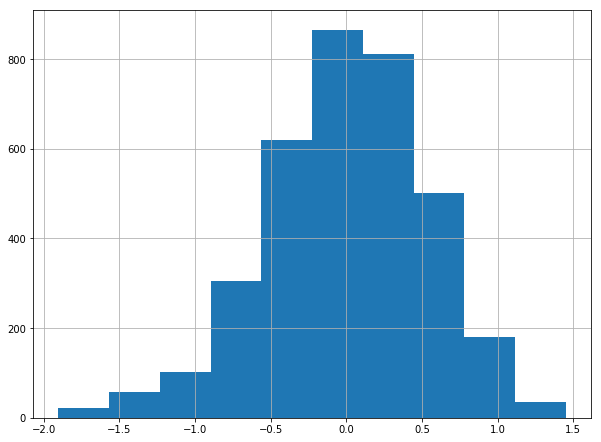

In [175]:
#Residuals Diagnostics
model3.resid.hist(bins=10)

In [176]:
model3.resid.mean()

5.596031574636332e-15

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


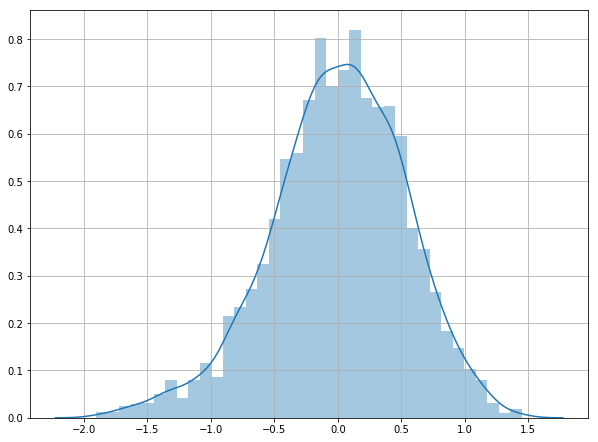

In [177]:
sns.distplot(model3.resid)

Decile Analysis 

In [57]:
train.columns

Index(['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat',
       'jobcat', 'union', 'employ',
       ...
       'news', 'response_01', 'response_02', 'response_03', 'Total_Spend',
       'birthmonth', 'ln_Total_Spend', 'pred_ln_Total_Spend', 'actual_spend',
       'pred_spend'],
      dtype='object', length=132)

In [178]:
### Decile Analysis
#Decile analysis for validation of models - Business validation

train['Deciles']=pd.qcut(train['pred_spend'],10, labels=False)
test['Deciles']=pd.qcut(test['pred_spend'],10, labels=False)
test

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


card  card2    ed  gender     lninc  response_03  ln_Total_Spend  \
2706   2.0    4.0  13.0     1.0  3.988984          0.0        6.234509   
2436   3.0    2.0  17.0     1.0  3.465736          0.0        5.847796   
1201   4.0    2.0  13.0     1.0  2.564949          0.0        5.396714   
1486   1.0    2.0  19.0     0.0  3.135494          0.0        6.978968   
4286   2.0    4.0  16.0     1.0  5.609508          0.0        6.617309   
2391   3.0    2.0  13.0     0.0  3.828641          1.0        5.556210   
4911   4.0    3.0  17.0     1.0  4.143135          0.0        6.454978   
3262   3.0    5.0  12.0     1.0  3.713572          0.0        5.960902   
1361   2.0    3.0  16.0     0.0  4.110874          0.0        6.285588   
149    4.0    3.0  16.0     1.0  4.595120          0.0        6.654694   
3123   3.0    1.0  12.0     0.0  5.505332          0.0        6.538574   
2395   4.0    1.0  13.0     0.0  3.367296          1.0        6.308918   
4677   3.0    4.0  11.0     0.0  3.637586          1.0        6.302161   
419    1.0    2.0   9.0     0.0  4.663439          0.0        5.801937   
3496   4.0    3.0  18.0     1.0  4.127134          0.0        5.371986   
3698   3.0    1.0  19.0     1.0  3.761200          1.0        6.410487   
2703   3.0    2.0  12.0     0.0  3.871201          0.0        5.581238   
2582   2.0    3.0  11.0     0.0  3.610918          1.0        5.768040   
2835   2.0    4.0  15.0     0.0  4.174387          0.0        6.143262   
4440   3.0    2.0  16.0     1.0  5.609472          1.0        6.802784   
613    4.0    3.0  13.0     1.0  4.007333          0.0        5.289378   
2240   3.0    2.0  11.0     0.0  2.772589          0.0        5.386740   
2606   4.0    1.0  17.0     1.0  4.897840          0.0        6.544674   
4860   1.0    3.0  11.0     0.0  2.772589          0.0        5.673358   
2361   4.0    2.0  12.0     1.0  4.025352          1.0        6.656199   
142    4.0    1.0  12.0     0.0  4.882802          0.0        6.457288   
2571   2.0    5.0  13.0     0.0  3.367296          0.0        5.406678   
3658   4.0    2.0  18.0     1.0  5.533389          0.0        5.894182   
1664   2.0    3.0  14.0     0.0  3.135494          0.0        5.096813   
3573   2.0    5.0  13.0     0.0  2.944439          0.0        5.373518   
...    ...    ...   ...     ...       ...          ...             ...   
991    1.0    4.0   9.0     1.0  4.919981          0.0        7.395507   
4369   3.0    2.0   8.0     1.0  3.367296          0.0        6.328294   
398    1.0    4.0  14.0     1.0  4.634729          0.0        6.452349   
1421   2.0    3.0  17.0     0.0  3.178054          1.0        6.050983   
3497   2.0    5.0  18.0     1.0  4.510860          0.0        5.379483   
522    2.0    3.0  16.0     0.0  3.737670          0.0        6.106310   
4216   4.0    2.0  15.0     0.0  4.804021          0.0        6.445815   
320    2.0    3.0  15.0     0.0  4.174387          0.0        5.924684   
305    4.0    3.0  14.0     0.0  3.555348          0.0        5.755742   
4121   4.0    2.0  17.0     0.0  4.406719          0.0        7.024738   
3250   3.0    1.0  15.0     1.0  3.610918          0.0        6.364596   
2782   1.0    2.0  17.0     0.0  4.543295          0.0        6.767009   
819    2.0    3.0  13.0     1.0  5.123964          0.0        5.516690   
1218   4.0    3.0  11.0     0.0  3.218876          1.0        4.598850   
4224   3.0    1.0  12.0     0.0  2.772589          0.0        4.777778   
1627   4.0    3.0  16.0     1.0  2.944439          0.0        5.252221   
961    4.0    3.0  19.0     1.0  4.804021          0.0        5.906533   
2109   2.0    3.0  12.0     1.0  3.806662          0.0        6.195609   
719    4.0    1.0  13.0     1.0  2.708050          0.0        5.832029   
4233   2.0    3.0  13.0     0.0  3.401197          0.0        6.233862   
2198   4.0    2.0  19.0     1.0  5.609508          0.0        6.368702   
3392   4.0    3.0  17.0     0.0  4.025352          0.0        6.102648   
4230   2.0

In [180]:
# Decile Analysis for train data
Predicted_avg = train[['Deciles','pred_spend']].groupby(train.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_avg = train[['Deciles','ln_Total_Spend']].groupby(train.Deciles).mean().sort_index(ascending=False)['ln_Total_Spend']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

pred_spend  ln_Total_Spend
Deciles                            
9        820.923511        6.701378
8        613.053112        6.449292
7        525.448076        6.216306
6        464.882700        6.152541
5        412.582123        6.045285
4        373.190629        5.933010
3        341.818141        5.768269
2        309.733710        5.770218
1        276.299602        5.610646
0        226.363976        5.424389

In [181]:
# Decile Analysis for train data
Predicted_avg = test[['Deciles','pred_spend']].groupby(test.Deciles).mean().sort_index(ascending=False)['pred_spend']
Actual_avg = test[['Deciles','ln_Total_Spend']].groupby(test.Deciles).mean().sort_index(ascending=False)['ln_Total_Spend']

In [182]:
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

pred_spend  ln_Total_Spend
Deciles                            
9        785.729508        6.632591
8        597.416317        6.386633
7        518.192326        6.245079
6        462.896714        6.099371
5        414.272604        5.979010
4        372.500732        5.917938
3        342.429317        5.802974
2        314.426056        5.863063
1        284.070788        5.651772
0        231.465575        5.412679

# Building Decision Tree Model

In [358]:
df_DT = card_spend_final[card_spend_final.columns.difference(df2.columns)]  #Feature selection before p-value reduction will be considered as p-value is a part of ols model build technique and here we are building different model technique

In [359]:
train_X, test_X, train_y, test_y = train_test_split( df_DT[df_DT.columns.difference(['ln_Total_Spend'])],df_DT['ln_Total_Spend'],test_size = 0.3,random_state = 56789)

In [360]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict

In [361]:
# list of values to try
max_depth_range = range(2, 11)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)
    
    MSE_scores = cross_val_score(treereg, train_X, train_y, cv=14, scoring='neg_mean_squared_error')
    
    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

Text(0, 0.5, 'RMSE (lower is better)')

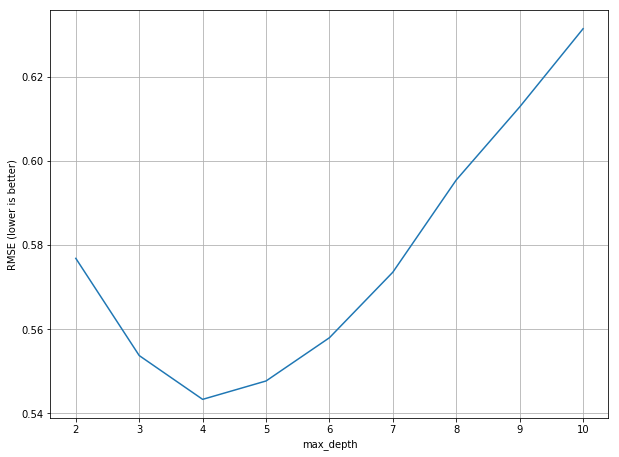

In [362]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [363]:
# max_depth=4 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=4, random_state=345)
treereg.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=345, splitter='best')

In [364]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':df_DT.columns.difference(['ln_Total_Spend']), 'importance':treereg.feature_importances_})

feature  importance
0            carvalue    0.002233
1    cbrt_card2tenure    0.000000
2          cbrt_lninc    0.419554
3                  ed    0.000000
4              gender    0.000000
5          lncreddebt    0.014544
6           lnothdebt    0.004232
7        log_callwait    0.000000
8            log_card    0.388268
9           log_card2    0.167052
10  log_cardtenurecat    0.000000
11         log_employ    0.004119
12        log_homeown    0.000000
13         log_owndvd    0.000000
14          log_owntv    0.000000
15          log_pager    0.000000
16         log_retire    0.000000
17              owncd    0.000000
18             ownpda    0.000000
19             ownvcr    0.000000
20        response_03    0.000000
21        sq_equipmon    0.000000
22        sq_internet    0.000000
23         sq_tollmon    0.000000
24   sqrt_carcatvalue    0.000000
25        sqrt_jobsat    0.000000
26     sqrt_lnlongten    0.000000
27            wiremon    0.000000

In [365]:
y_pred = treereg.predict(test_X) 

In [366]:
# use fitted model to make predictions on testing data
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
dt

Actual  Predicted
4133  6.289808   6.176941
3771  7.348768   6.757886
26    6.307497   6.176941
2049  5.730652   5.726945
3385  6.283294   6.992413
2240  5.386740   5.308291
671   6.410520   6.260539
3049  6.566293   6.019597
3543  6.103677   6.019597
522   6.106310   5.726945
2213  7.097499   6.019597
2556  6.346688   6.019597
4084  5.745756   6.019597
4469  6.834163   6.019597
2253  6.224281   6.349080
4535  6.113682   5.726945
1161  6.390174   6.260539
3683  5.579050   6.019597
3133  5.633360   5.726945
2819  4.650144   5.726945
1414  6.855788   6.992413
2289  5.854556   5.726945
4883  5.817111   5.726945
4651  5.420712   6.260539
4160  5.582744   5.726945
4801  6.615677   6.730119
3687  5.753525   6.019597
3573  5.373518   5.726945
4970  5.820439   5.800806
4588  6.383017   6.260539
...        ...        ...
495   6.176906   5.726945
1444  5.999854   5.726945
2057  6.220272   6.593877
394   5.666565   6.019597
3423  5.826619   6.019597
4381  6.666702   5.726945
3522  5.637928   6.019597
2714  5.596791   5.726945
564   6.580819   6.757886
2882  5.424421   5.726945
3414  7.473127   6.019597
696   5.534338   6.593877
4506  6.430106   6.349080
2264  5.958864   5.308291
2797  5.639990   5.726945
3004  5.685211   6.593877
4143  5.934497   6.593877
3310  5.475794   5.726945
2002  5.080659   5.726945
4481  5.949418   5.726945
1533  5.792434   5.726945
2931  4.908012   5.726945
750   5.996626   5.308291
2309  5.701213   5.726945
4451  6.830637   6.176941
4001  5.989713   6.260539
2946  6.427734   6.593877
4987  6.043867   5.726945
2533  5.469030   5.726945
4973  5.276378   5.726945

[1500 rows x 2 columns]

In [367]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.42348904544019705
Mean Squared Error: 0.28663823966783625
Root Mean Squared Error: 0.5353860660008217


In [368]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",treereg.score(train_X, train_y))
print("R-squared for Test:",treereg.score(test_X, test_y))

R-squared for Train: 0.33096624511204453
R-squared for Test: 0.26083439566656474


# Random Forest


In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [370]:
param_grid={'max_depth': range(3,11),
            'n_estimators': (10, 50, 100)}

In [371]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(train_X, train_y)

In [372]:
grid_result.best_score_

0.3116445279536559

In [373]:
grid_result.best_params_

{'max_depth': 4, 'n_estimators': 100}

In [374]:
rfr = RandomForestRegressor(max_depth=4,n_estimators=50, random_state=0)  
rfr.fit(train_X, train_y)  
y_pred = rfr.predict(test_X) 

In [375]:
scores = cross_val_score(rfr, train_X, train_y, cv=10, scoring='neg_mean_absolute_error')
scores

array([-0.43351412, -0.42098147, -0.40282767, -0.4216138 , -0.39987984,
       -0.42123272, -0.458495  , -0.43664979, -0.44434308, -0.41873483])

In [376]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})  
dt

Actual  Predicted
4133  6.289808   6.234744
3771  7.348768   6.780824
26    6.307497   6.124662
2049  5.730652   5.713824
3385  6.283294   6.940222
2240  5.386740   5.554077
671   6.410520   6.273892
3049  6.566293   6.055015
3543  6.103677   6.035327
522   6.106310   5.804566
2213  7.097499   6.049710
2556  6.346688   6.120606
4084  5.745756   6.012734
4469  6.834163   6.012734
2253  6.224281   6.365331
4535  6.113682   5.753849
1161  6.390174   6.321102
3683  5.579050   6.001772
3133  5.633360   5.686824
2819  4.650144   5.713824
1414  6.855788   6.925408
2289  5.854556   5.713824
4883  5.817111   5.713824
4651  5.420712   6.241549
4160  5.582744   5.670006
4801  6.615677   6.554902
3687  5.753525   6.055015
3573  5.373518   5.676155
4970  5.820439   5.899011
4588  6.383017   6.281415
...        ...        ...
495   6.176906   5.675189
1444  5.999854   5.707675
2057  6.220272   6.570018
394   5.666565   5.969773
3423  5.826619   6.001772
4381  6.666702   5.713824
3522  5.637928   6.001772
2714  5.596791   5.680675
564   6.580819   6.751569
2882  5.424421   5.739017
3414  7.473127   6.147824
696   5.534338   6.534291
4506  6.430106   6.587039
2264  5.958864   5.307701
2797  5.639990   5.713824
3004  5.685211   6.538020
4143  5.934497   6.663618
3310  5.475794   5.713824
2002  5.080659   5.858567
4481  5.949418   5.739017
1533  5.792434   5.680675
2931  4.908012   5.670006
750   5.996626   5.279234
2309  5.701213   5.739017
4451  6.830637   6.081731
4001  5.989713   6.217057
2946  6.427734   6.661112
4987  6.043867   5.713824
2533  5.469030   5.670006
4973  5.276378   5.713824

[1500 rows x 2 columns]

In [377]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.41556929145798177
Mean Squared Error: 0.2761442110755714
Root Mean Squared Error: 0.5254942540842586


In [378]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",rfr.score(train_X, train_y))
print("R-squared for Test:",rfr.score(test_X, test_y))

R-squared for Train: 0.34536114778326493
R-squared for Test: 0.2878957709920712


## SVR

In [379]:
from sklearn.svm import SVR

In [384]:
svr1 = SVR()
parameters = {'kernel': ['rbf','poly'],
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.5]}

In [ ]:
svr = GridSearchCV(svr1,parameters)

grid_result = svr.fit(train_X, train_y)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print(svr.best_params_)

In [ ]:
svr = SVR(kernel=, C=, gamma=, epsilon=)
svr.fit(train_X, train_y)
y_pred=svr.predict(test_X)

In [ ]:
dt=pd.DataFrame({'Actual':test_y, 'Predicted':y_pred})
dt

In [381]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

Mean Absolute Error: 0.4752389914826728
Mean Squared Error: 0.37554475413615973
Root Mean Squared Error: 0.6128170641685492


In [ ]:
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is.
print("R-squared for Train:",svr.score(train_X, train_y))
print("R-squared for Test:",svr.score(test_X, test_y))